# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split       # function
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------


# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)
 
    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# nan_cols = check_nan(df)
# --------------------------------------------------

# --------------------------------------------------
def check_outliers(X_train, features, rate=1.5):
    
    dict = {}
    
    for col in features:
        
        Q1 = np.percentile(X_train[col], 25) 
        Q3 = np.percentile(X_train[col], 75) 
        IQR = Q3 - Q1
        
        min = Q1 - (rate * IQR)
        max = Q3 + (rate * IQR)
        
        idxs = X_train[(X_train[col] < min) | (X_train[col] > max)].index
        
        dict[col] = idxs
        
    return dict
# check_outliers(X_train, 'Insulin')
# --------------------------------------------------

# --------------------------------------------------
def check_object(df):
    object_cols = list(df.dtypes[df.dtypes == 'object'].index)
    print('object_cols count =', len(object_cols))
    for col in object_cols:
        print('-' * 30)
        print(df[col].value_counts())
    return object_cols
# object_cols = encode(df)
# --------------------------------------------------

# --------------------------------------------------
def mapping(df, col, dict):
    dict = {}
    
    for i in range(len(df[col].value_counts().index)):
        dict[df[col].value_counts().index[i]] = i
    
    df['e_' + col] = df[col].map(dict)
    return df['e_' + col].value_counts()
# mapping(df, 'gender')
# --------------------------------------------------

# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred, average='macro')
    accuracy  = accuracy_score   (y_test, y_pred, )
    precision = precision_score  (y_test, y_pred, average='macro')
    recall    = recall_score     (y_test, y_pred, average='macro')
    c_matrix  = confusion_matrix (y_test, y_pred, )
    
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1 score  = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    print(c_matrix)
    
    # plt.figure(figsize=(12, 9))
    # plt.title('confusion matrix')
    # plt.xlabel('Predict')
    # plt.ylabel('Actual')
    # sns.heatmap(c_matrix, annot=True, linewidths=1, cmap='Blues', annot_kws={"size": 14})
    # plt.show()
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])
 
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
 
    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')
 
    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()
 
    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
 
    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')
 
    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()
 
    plt.show()
    
    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------

# metrics imports

In [2]:
# # classification GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# classification_models = [RandomForestClassifier(),
#                          GradientBoostingClassifier(),
#                          XGBClassifier(), 
#                          XGBRFClassifier(), 
#                          LGBMClassifier(), 
#                          CatBoostClassifier(),
#                          ]

# # param_grid=
# hyper_param = {'n_estimators':[100],
#                'random_state':[0],
#               #  'min_samples_split':[2],
#               #  'min_samples_leaf':[1],
#                }

# # scoring=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# classification_cols = ['mean_test_f1_macro', 'mean_test_accuracy', 
#                        'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc_ovr',]

# # GridSearchCV loop
# for model in classification_models:
        
#         gscv = GridSearchCV(model, param_grid=hyper_param, 
#                             scoring=classification_scorers, refit='f1_macro', 
#                             cv=skf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 75)
#         print('estimtor        =', gscv.estimator)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[classification_cols]
#         met_df.columns = ['f1_macro', 'accuracy', 'precision', 'recall', 'auc_ovr',]
#         print(met_df)

In [3]:
# # classification cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # estimators=
# classification_models = [RandomForestClassifier(random_state=0),
#                          GradientBoostingClassifier(random_state=0),
#                          XGBClassifier(random_state=0),
#                          XGBRFClassifier(random_state=0),
#                          LGBMClassifier(random_state=0),
#                          CatBoostClassifier(random_state=0),
#                          ]

# # scorings=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in classification_models:
    
#     cv_results = cross_validate(model, X_met, y_met,
#                                 scoring=classification_scorers,
#                                 cv=skf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 70)
#     print('model  =', model.__class__.__name__)
#     print('params =', model.get_params(deep=True))
    
#     # classification metrics
#     print('f1_macro  = {}  '.format(cv_results['test_f1_macro'].mean()),
#           'accuracy  = {}  '.format(cv_results['test_accuracy'].mean()), '\n'
#           'precision = {}  '.format(cv_results['test_precision'].mean()),
#           'recall    = {}  '.format(cv_results['test_recall'].mean()), '\n'
#           'AUC_ovr   = {}  '.format(cv_results['test_roc_auc_ovr'].mean()),
#           )
    
#     fi_list = []
#     for idx, estimator in enumerate(cv_results['estimator']):
#         fi = pd.DataFrame(estimator.feature_importances_, 
#                           index=X_met.columns, columns=['importance']).sort_values('importance', ascending=False)
        
#         fi_list.append(estimator.feature_importances_.tolist())
#     fi_means = np.array(fi_list).mean(axis=0)
#     fi_df = pd.DataFrame(fi_means, columns=['importance'], index=X_met.columns).sort_values(by='importance', ascending=False)
#     fig, ax = plt.subplots(figsize=(16, 12))
#     sns.set_theme(style='whitegrid')
#     sns.set_color_codes('pastel')
#     sns.barplot(x='importance', y_met=X_met.columns, data=fi_df)
#     plt.show()

In [4]:
# # regression cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'count'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_train_test_met = train_met.drop(target_met, axis=1)
# y_train_test_met = train_met[target_met]

# # estimators=
# regressor_models = [
#                     LinearRegression      (),
#                     DecisionTreeRegressor (random_state=0),
#                     Ridge                 (random_state=0),
#                     Lasso                 (random_state=0),
#                     ElasticNet            (random_state=0),
#                     RandomForestRegressor (random_state=0),
#                     XGBRegressor          (random_state=0),
#                     LGBMRegressor         (random_state=0),
#                     CatBoostRegressor     (random_state=0, verbose=0),
#                     ]

# # scorings=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in regressor_models:
    
#     cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
#                                 scoring=regressor_scorers,
#                                 cv=kf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 40)
#     print('model  =', model.__class__.__name__)
#     # print('params =', model.get_params(deep=True))
    
#     # regression metrics
#     print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
#           'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()),
#         #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
#         #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
#           )

In [5]:
# # regression GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# regressor_models = [
#                     # LinearRegression(),
#                     # RandomForestRegressor(),
#                     Ridge(),
#                     Lasso(),
#                     ElasticNet(),
#                     DecisionTreeRegressor(),
#                     XGBRegressor(),
#                     LGBMRegressor(),
#                     # CatBoostRegressor(),
#                     ]

# # param_grid=
# hyper_param = {
#                'random_state':[0],
#                }

# # scoring=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# regression_cols = ['mean_test_MSE', 'mean_test_RMSE', 
#                 #    'mean_test_MSLE', 'mean_test_MAE',
#                    ]

# # GridSearchCV loop
# for model in regressor_models:
        
#         gscv = GridSearchCV(model, 
#                             param_grid=hyper_param, 
#                             scoring=regressor_scorers, refit='RMSE', 
#                             cv=kf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 40)
#         print('estimtor        =', gscv.estimator.__class__.__name__)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', - gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[regression_cols]
#         met_df.columns = ['MSE', 'RMSE', 
#                         #   'MSLE', 'MAE',
#                           ]
#         print(- met_df)

# read : bike sharing

In [6]:
# https://www.kaggle.com/c/bike-sharing-demand/overview/evaluation

train = pd.read_csv('./kaggle/bike_sharing_demand/train.csv')
X_sub = pd.read_csv('./kaggle/bike_sharing_demand/test.csv')
y_sub = pd.read_csv('./kaggle/bike_sharing_demand/sampleSubmission.csv')

train.shape, X_sub.shape, y_sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [7]:
df = pd.concat([train, X_sub])
df.shape

(17379, 12)

# check target : casual, registered, count

In [8]:
train_cp = train.copy()
train_cp.shape

(10886, 12)

In [9]:
train_cp['cr'] = train_cp['casual'] + train_cp['registered']
train_cp[train_cp['count'] != train_cp['cr']]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,cr


# df00

## check object

In [10]:
import datetime as dt
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df['year']  = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day']   = df['datetime'].dt.day
df['hour']  = df['datetime'].dt.hour
df['week']  = df['datetime'].dt.dayofweek

In [12]:
df00 = df
df00 = df00.drop('datetime', axis=1)

In [13]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   casual      10886 non-null  float64
 9   registered  10886 non-null  float64
 10  count       10886 non-null  float64
 11  year        17379 non-null  int64  
 12  month       17379 non-null  int64  
 13  day         17379 non-null  int64  
 14  hour        17379 non-null  int64  
 15  week        17379 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 2.3 MB


In [14]:
df00.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,1,4,5


# met00

In [15]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'count'
# ==================================================

# X, y split
train_met = df_met[df_met[target_met].notna()]
X_train_test_met = train_met.drop(target_met, axis=1)
y_train_test_met = train_met[target_met]

# estimators=
regressor_models = [
                    LinearRegression      (),
                    DecisionTreeRegressor (random_state=0),
                    Ridge                 (random_state=0),
                    Lasso                 (random_state=0),
                    ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

# scorings=
regressor_scorers = {'MSE':'neg_mean_squared_error',
                     'RMSE':'neg_root_mean_squared_error',
                     'MSLE':'neg_mean_squared_log_error',
                    #  'MAE':'neg_mean_absolute_error',
                     }

# cv=
kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# cross_validate loop
for model in regressor_models:
    
    cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
                                scoring=regressor_scorers,
                                cv=kf,
                                return_train_score=True, return_estimator=True)
    
    print('-' * 40)
    print('model  =', model.__class__.__name__)
    # print('params =', model.get_params(deep=True))
    
    # regression metrics
    print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
          'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()), '\n'
          'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()), '\n'
          'RMSLE  = {}  '.format(np.sqrt(- cv_results['test_MSLE'].mean()))
        #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
          )

----------------------------------------
model  = LinearRegression
MSE    = 5.787374610733502e-25   
RMSE   = 6.528980683574458e-13   
MSLE   = 3.629645536277395e-27   
RMSLE  = 6.02465396207732e-14  
----------------------------------------
model  = DecisionTreeRegressor
MSE    = 34.496347953582685   
RMSE   = 5.867615646374526   
MSLE   = 0.0005523973802283897   
RMSLE  = 0.023503135540356945  
----------------------------------------
model  = Ridge
MSE    = 1.013548780989339e-11   
RMSE   = 3.1834340433451213e-06   
MSLE   = 3.104161482162249e-14   
RMSLE  = 1.761863071343017e-07  
----------------------------------------
model  = Lasso
MSE    = 0.0004480514187574241   
RMSE   = 0.02116062099691964   
MSLE   = 8.80434210987593e-07   
RMSLE  = 0.0009383145586569533  
----------------------------------------
model  = ElasticNet
MSE    = 0.000434114884235756   
RMSE   = 0.020832181940355635   
MSLE   = 8.681198562278363e-07   
RMSLE  = 0.0009317294973477207  
--------------------------

# df01

## corr

In [16]:
df01 = df00
train = df01[df01[target_met].notna()]
X_sub = df01[df01[target_met].isna()]
train.shape, X_sub.shape

((10886, 16), (6493, 16))

<AxesSubplot:>

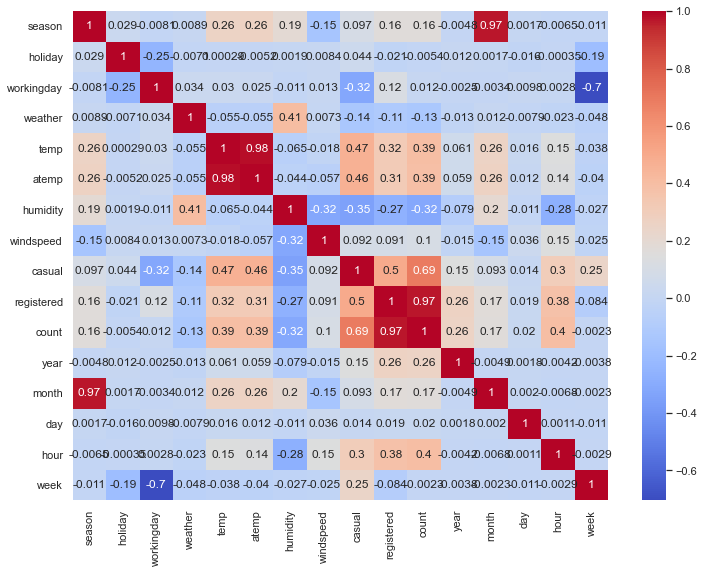

In [17]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

## workingday, week

In [18]:
df01['working1_peak'] = df01[['workingday','week']].apply(
    lambda x : (1, 0) [
        x['workingday'] == 1 and 
        (x['week'] != 5 or x['week'] != 6)
        ], axis=1)
df01['working1_peak'].value_counts()

0    11865
1     5514
Name: working1_peak, dtype: int64

In [19]:
df01['working0_peak'] = df01[['workingday','week']].apply(
    lambda x : (1, 0) 
    [x['workingday'] == 0 and
     (x['week'] == 5 or x['week'] == 6)
     ], axis=1)
df01['working0_peak'].value_counts()

1    12365
0     5014
Name: working0_peak, dtype: int64

# df02

## hour

In [20]:
df02 = df01
train = df02[df02[target_met].notna()]
X_sub = df02[df02[target_met].isna()]
train.shape, X_sub.shape

((10886, 18), (6493, 18))

<AxesSubplot:xlabel='hour', ylabel='count'>

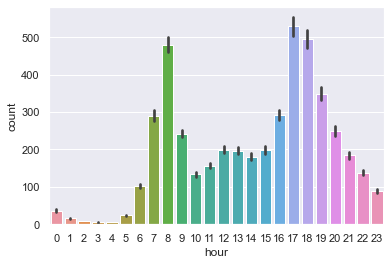

In [21]:
sns.barplot(x='hour', y="count", data=train[train['workingday'] == 1])

<AxesSubplot:xlabel='hour', ylabel='count'>

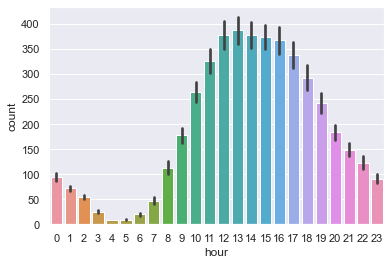

In [22]:
sns.barplot(x='hour', y="count", data=train[train['workingday'] == 0])

In [23]:
# 평일 workingday 1 / 8, 17, 18
df02['hour_peak'] = df02[['workingday','hour']].apply(
    lambda x : (1, 0) [
        x['workingday'] == 1 and 
        (x['hour'] == 8 or 17 <= x['hour'] <= 18)
        ], axis=1)

# 휴일 workingday 0 / 10~19
df02['hour_peak'] = df02[['workingday','hour']].apply(
    lambda x : (1 ,0) [
        x['workingday'] == 0 and 
        10 <= x['hour'] <= 19
        ], axis=1)
df02['hour_peak'].value_counts()

1    15071
0     2308
Name: hour_peak, dtype: int64

## temp, humidity, weather, windspeed

<AxesSubplot:xlabel='temp', ylabel='Density'>

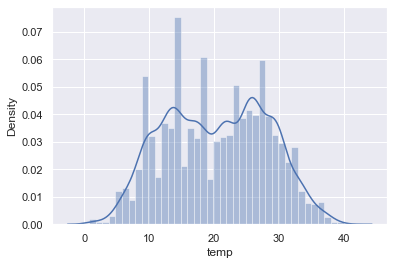

In [24]:
sns.distplot(df02['temp'])

<AxesSubplot:xlabel='humidity', ylabel='Density'>

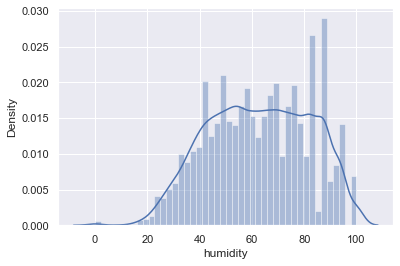

In [25]:
sns.distplot(df02['humidity'])

<AxesSubplot:xlabel='weather', ylabel='Density'>

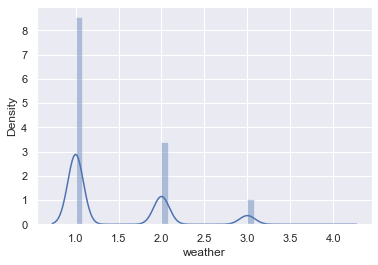

In [26]:
sns.distplot(df02['weather'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

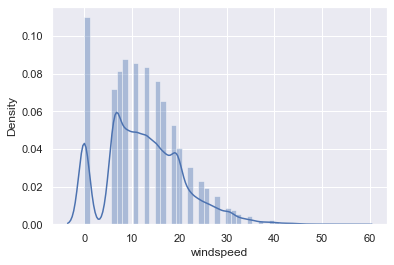

In [27]:
sns.distplot(df02['windspeed'])

In [28]:
df02['weather_peak'] = df02[['temp','humidity','weather','windspeed']].apply(
    lambda x : (1, 0) [
        10 <= x['temp']      <= 30 and 
        30 <= x['humidity']  <= 90 and 
        0  <= x['windspeed'] <= 24 and
        x['weather'] in [1, 2]
        ], axis=1)
df02['weather_peak'].value_counts()

0    10204
1     7175
Name: weather_peak, dtype: int64

## weekend

In [29]:
df02['weekend'] = df02[['week']].apply(
    lambda x : (1, 0) [
        x['week'] == 5 or 
        x['week'] == 6
        ], axis=1)
df02['weekend'].value_counts()

1    12365
0     5014
Name: weekend, dtype: int64

## windspeed : missing values

In [30]:
df02_cp = df02[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']].copy()
df02_cp[df02_cp['windspeed'] == 0].head()

,season,weather,temp,atemp,humidity,windspeed
0,1,1,9.84,14.395,81,0.0
1,1,1,9.02,13.635,80,0.0
2,1,1,9.02,13.635,80,0.0
3,1,1,9.84,14.395,75,0.0
4,1,1,9.84,14.395,75,0.0


In [31]:
wind  = df02[df02['windspeed'] != 0][['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
wind0 = df02[df02['windspeed'] == 0][['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
wind.shape, wind0.shape

((15199, 6), (2180, 6))

In [32]:
X_wind = wind.drop('windspeed', axis=1)
y_wind = wind['windspeed']
X_wind.shape, y_wind.shape

((15199, 5), (15199,))

In [33]:
wind_test = wind0.drop('windspeed', axis=1)
wind_test.shape

(2180, 5)

In [34]:
# wind로 train / wind0 pred

regressor_models = [
                    # LinearRegression      (),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    # DecisionTreeRegressor (random_state=0),
                    # RandomForestRegressor (random_state=0),
                    # XGBRegressor          (random_state=0),
                    LGBMRegressor         (random_state=0),
                    # CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    # 학습은 y_log : 음수를 없애기 위해
    model.fit(X_wind, y_wind)
    wind_pred = model.predict(wind_test)
    
    # 점수는 복원
    # y_test_exp = np.expm1(y_test)
    # y_pred_exp = np.expm1(y_pred)
    
    # msle, rmsle
    # msle  = mean_squared_error(y_test_exp, y_pred_exp)
    # rmsle = np.sqrt(msle)
    
    # print('-' * 50)
    # print(model.__class__.__name__)
    # print(rmsle)

In [35]:
wind0['windspeed'] = np.round(wind_pred, 5)
wind0.head()

,season,weather,temp,atemp,humidity,windspeed
0,1,1,9.84,14.395,81,5.54097
1,1,1,9.02,13.635,80,5.71502
2,1,1,9.02,13.635,80,5.71502
3,1,1,9.84,14.395,75,5.78901
4,1,1,9.84,14.395,75,5.78901


<AxesSubplot:>

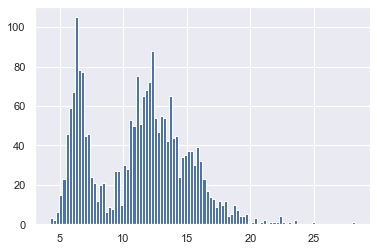

In [36]:
wind0['windspeed'].hist(bins=100)

<AxesSubplot:>

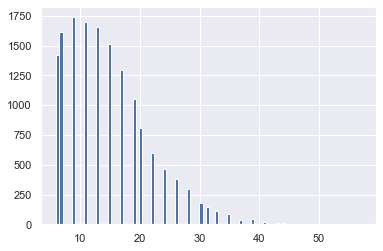

In [37]:
wind['windspeed'].hist(bins=100)

<AxesSubplot:>

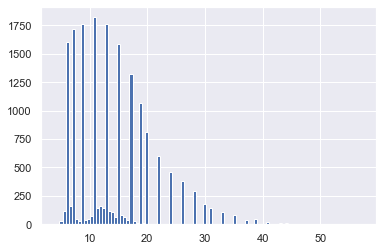

In [38]:
windcp = pd.concat([wind, wind0])
windcp['windspeed'].hist(bins=100)

In [39]:
df02[df02['windspeed'] == 0]['windspeed'] = np.round(wind_pred, 5)

<AxesSubplot:>

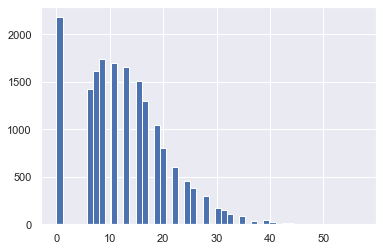

In [40]:
df02['windspeed'].hist(bins=50)

In [41]:
# 시계열성 데이터인데, drop하면 시계열이 아니게 됨
# drop했기 때문에, 시계열의 기능을 버렸음
# 왜 버려도 되는가? 시계열이 이어지지 않기 때문?
# train, X_sub가 시간 기준으로 잘라져 있기 때문

In [42]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         17379 non-null  int64  
 1   holiday        17379 non-null  int64  
 2   workingday     17379 non-null  int64  
 3   weather        17379 non-null  int64  
 4   temp           17379 non-null  float64
 5   atemp          17379 non-null  float64
 6   humidity       17379 non-null  int64  
 7   windspeed      17379 non-null  float64
 8   casual         10886 non-null  float64
 9   registered     10886 non-null  float64
 10  count          10886 non-null  float64
 11  year           17379 non-null  int64  
 12  month          17379 non-null  int64  
 13  day            17379 non-null  int64  
 14  hour           17379 non-null  int64  
 15  week           17379 non-null  int64  
 16  working1_peak  17379 non-null  int64  
 17  working0_peak  17379 non-null  int64  
 18  hour_pe

## onehot encoding

### categorical features

In [43]:
df02.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,year,month,day,hour,week,working1_peak,working0_peak,hour_peak,weather_peak,weekend
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,...,2011,1,1,0,5,1,0,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,...,2011,1,1,1,5,1,0,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,...,2011,1,1,2,5,1,0,1,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,...,2011,1,1,3,5,1,0,1,1,0
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,...,2011,1,1,4,5,1,0,1,1,0


In [44]:
oh_cols = ['season', 'weather', 'year', 'month', 'day', 'hour', 'week']
sc_cols = ['temp', 'atemp', 'humidity', 'windspeed']

In [45]:
# onehot, getdummies는 str일때만

for col in oh_cols:
    oh_df = pd.get_dummies(df02[col], prefix=col)
    df02 = pd.concat([df02, oh_df], axis=1)

In [46]:
df02.shape

(17379, 105)

## scale

In [47]:
train = df02[df02['count'].notna()]
X_sub = df02[df02['count'].isna()]
train.shape, X_sub.shape

((10886, 105), (6493, 105))

In [48]:
ss = StandardScaler()

ss.fit(train[sc_cols])

train[sc_cols] = ss.transform(train[sc_cols])
X_sub[sc_cols] = ss.transform(X_sub[sc_cols])

In [49]:
train[sc_cols].head()

,temp,atemp,humidity,windspeed
0,-1.333661,-1.092737,0.993213,-1.567754
1,-1.438907,-1.182421,0.941249,-1.567754
2,-1.438907,-1.182421,0.941249,-1.567754
3,-1.333661,-1.092737,0.681430,-1.567754
4,-1.333661,-1.092737,0.681430,-1.567754


In [50]:
X_sub[sc_cols].head()

,temp,atemp,humidity,windspeed
0,-1.228414,-1.450292,-0.305883,1.617227
1,-1.228414,-1.182421,-0.305883,-1.567754
2,-1.228414,-1.182421,-0.305883,-1.567754
3,-1.228414,-1.271515,-0.305883,-0.220230
4,-1.228414,-1.271515,-0.305883,-0.220230


In [51]:
df02 = pd.concat([train, X_sub])
df02.shape

(17379, 105)

In [52]:
df02.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered',
       ...
       'hour_21', 'hour_22', 'hour_23', 'week_0', 'week_1', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6'],
      dtype='object', length=105)

# met02

In [53]:
train_test = df02[df02['count'].notna()]
X_sub = df02[df02['count'].isna()].drop('count', axis=1)
X_train_test = train_test.drop('count', axis=1)
y_train_test = train_test['count']
X_train_test.shape, y_train_test.shape, X_sub.shape

((10886, 104), (10886,), (6493, 104))

## log : y

In [54]:
y_train_test_log = np.log1p(y_train_test)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test_log, test_size=0.2, random_state=0, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 104), (2178, 104), (8708,), (2178,))

In [56]:
regressor_models = [
                    LinearRegression      (),
                    Ridge                 (random_state=0),
                    Lasso                 (random_state=0),
                    ElasticNet            (random_state=0),
                    DecisionTreeRegressor (random_state=0),
                    RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    # 학습은 y_log : 음수를 없애기 위해
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 점수는 복원
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)
    
    # msle, rmsle
    msle  = mean_squared_error(y_test_exp, y_pred_exp)
    rmsle = np.sqrt(msle)
    
    print('-' * 50)
    print(model.__class__.__name__)
    print(rmsle)

--------------------------------------------------
LinearRegression
142.04952732607046
--------------------------------------------------
Ridge
142.72866813914683
--------------------------------------------------
Lasso
537.8064121615139
--------------------------------------------------
ElasticNet
513.0396596034217
--------------------------------------------------
DecisionTreeRegressor
6.255355831926909
--------------------------------------------------
RandomForestRegressor
3.0589143618624584
--------------------------------------------------
XGBRegressor
3.737545442772028
--------------------------------------------------
LGBMRegressor
4.000697835704276
--------------------------------------------------
CatBoostRegressor
3.6579532569392166


In [57]:
regressor_models = [
                    # LinearRegression      (),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    # DecisionTreeRegressor (random_state=0),
                    # RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0),
                    # LGBMRegressor         (random_state=0),
                    # CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    # 학습은 y_log : 음수를 없애기 위해
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 점수는 복원
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)
    
    # msle, rmsle
    msle  = mean_squared_error(y_test_exp, y_pred_exp)
    rmsle = np.sqrt(msle)
    
    print('-' * 50)
    print(model.__class__.__name__)
    print(rmsle)

--------------------------------------------------
XGBRegressor
3.737545442772028


In [58]:
X_sub.shape

(6493, 104)

In [59]:
# RMSLE는 under estimate할때 페널티가 크기 때문에,
# 수치를 맞추기 위해서 보통 올림 처리

In [60]:
y_sub['count'] = np.round(np.expm1(model.predict(X_sub))).astype(int)

In [61]:
y_sub.head()

,datetime,count
0,2011-01-20 00:00:00,1
1,2011-01-20 01:00:00,1
2,2011-01-20 02:00:00,1
3,2011-01-20 03:00:00,1
4,2011-01-20 04:00:00,1


In [62]:
y_sub.to_csv('./kaggle/bike_sharing_demand/submission_pjh.csv')

In [63]:
y_sub = y_sub.set_index('datetime')
y_sub.head()

,count
datetime,
2011-01-20 00:00:00,1
2011-01-20 01:00:00,1
2011-01-20 02:00:00,1
2011-01-20 03:00:00,1
2011-01-20 04:00:00,1


In [64]:
y_sub.to_csv('./kaggle/bike_sharing_demand/submission_pjh.csv')

In [ ]:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# overfitting 해결

# df03

In [65]:
# boosting은 overfitting 자주 발생
df03 = df02

In [66]:
break

SyntaxError: 'break' outside loop (Temp/ipykernel_8620/668683560.py, line 1)